Feature ranking:


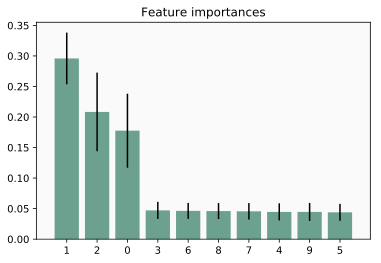

In [1]:
#!/usr/bin/env python
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
#plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = '#fafafa'
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], 
       color="#6ca18f", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [2]:
X.shape

(1000, 10)

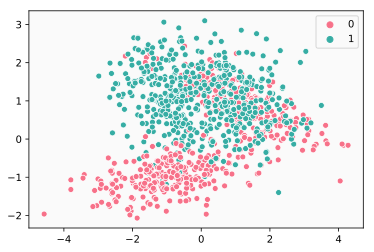

In [3]:
import seaborn as sns
plt.figure()
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='husl');

#plt.figure()
#sns.scatterplot(X[:,0], X[:,2], hue=y, palette='husl');

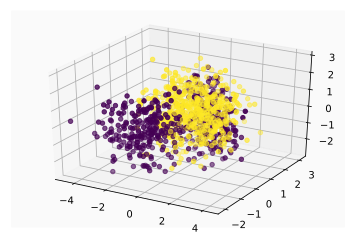

In [4]:
%matplotlib inline

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

#ax.view_init(60, 35)

ax.scatter3D(X[:,0], X[:,1], X[:,3], c=y, cmap='viridis');